In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [6]:
# Do MLR, SLR and logR with gradient descent in each choosing abalone or diabetes of titanic

df = pd.read_excel("abalone.xlsx")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## SLR

In [20]:
x = df.Length
y = df.Diameter
xbar = np.mean(x)
ybar = np.mean(y)
df["xi-xbar"] = df.Length - xbar
df["yi-ybar"] = df.Diameter - ybar
df["xi-xbar_sqr"] = df["xi-xbar"] ** 2
df["mul_xi-xbar_yi-ybar"] = df["xi-xbar"] * df["yi-ybar"]
num = sum(df["mul_xi-xbar_yi-ybar"])
denom = sum(df["xi-xbar_sqr"])

b1 = num / denom
b0 = ybar - b1 * xbar

In [21]:
b1

0.8154606917560928

In [22]:
b0

-0.01941370551997429

### Gradient descent

In [66]:
b0 = 0
b1 = 0
m = len(x)
l = 0.0003

# y = b0 + b1 x

def get_error(b0, b1):
    return np.power((yhat - y), 2)

def cost_fn(error: list):
    return ((1 / (2 * m)) * np.sum(error ** 2))

b0_arr = []
b1_arr = []
cf_arr = []

for i in range(m):
    yhat = b0 + b1 * x[i]
    yi = y[i]
    xi = x[i]
    rmse = get_error(yhat, yi)
    db1 = (-2 / m) * np.sum(xi * get_error(yhat, yi))
    db0 = (-2 / m) * np.sum(get_error(yhat, yi))
    b1 = b1 - l * db1
    b0 = b0 - l * db0
    
    b0_arr.append(b0)
    b1_arr.append(b1)
    
    cf = cost_fn((b0 + b1 * xi)-yi)
    cf_arr.append(cf)
    
df_ = pd.DataFrame({"B0": b0_arr, "B1": b1_arr, "CF": cf_arr})
df_

df_.loc[df_.CF.idxmin()]
    

B0    5.499524e-06
B1    3.014450e-06
CF    3.620266e-07
Name: 236, dtype: float64

0.010245319654847717
0.005886800605162935


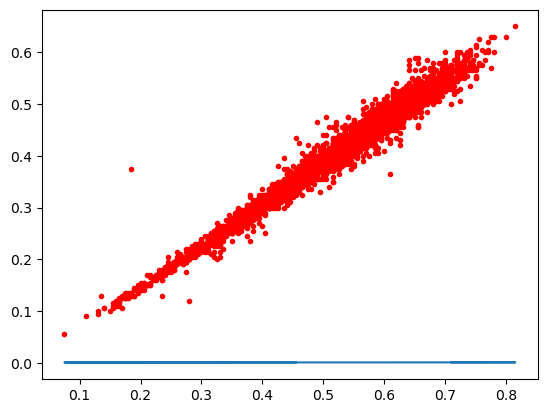

In [64]:
print(b0)
print(b1)
plt.plot(x,y,"r.")
plt.plot(x, 5.490322e-04 + 3.009534e-04 * x)
plt.show()

## Logistic regression

In [68]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
